<a href="https://colab.research.google.com/github/kamalidharan/Data-Mining-projects-/blob/main/Data_Mining_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE

##### Reading data

In [ ]:
data = pd.read_csv('/content/Malware-staDyn-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Columns: 1085 entries, Virtual to label
dtypes: float64(7), int64(1078)
memory usage: 51.7 MB


##### Splitting features and labels

In [ ]:
X,y = data.drop(['label'], axis = 1), data['label']

##### **Secondary result - Question 1** - Create a pie chart to show label (files) distribution

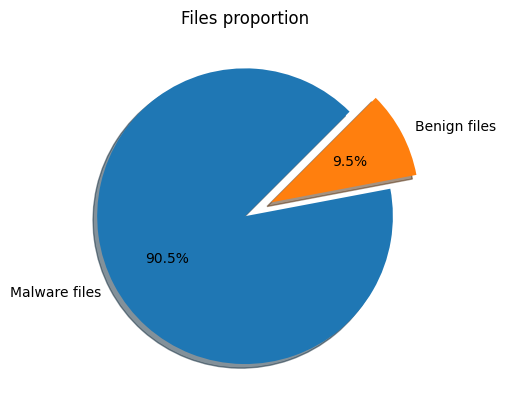

In [ ]:
y_agg = np.array(y.value_counts())
y_labels = ['Malware files', 'Benign files']
myExplode = [0, 0.2]
fig, ax = plt.subplots()
ax.pie(y_agg, labels = y_labels, explode = myExplode, autopct='%1.1f%%', startangle = 45, shadow = True)
ax.set_title('Files proportion')
plt.show()




##### Splitting data in to train (75%) and test set (25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

#### ROS and SMOTE data sampling

In [ ]:
ros = RandomOverSampler()
X_ros_resampled, y_ros_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
smote = SMOTE()
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_ros_resampled.value_counts()
# y_smote_resampled.value_counts()

1    3785
0    3785
Name: label, dtype: int64

#### **Secondary result - Question 2:** Distribution after data balancing

1    3785
0    3785
Name: label, dtype: int64


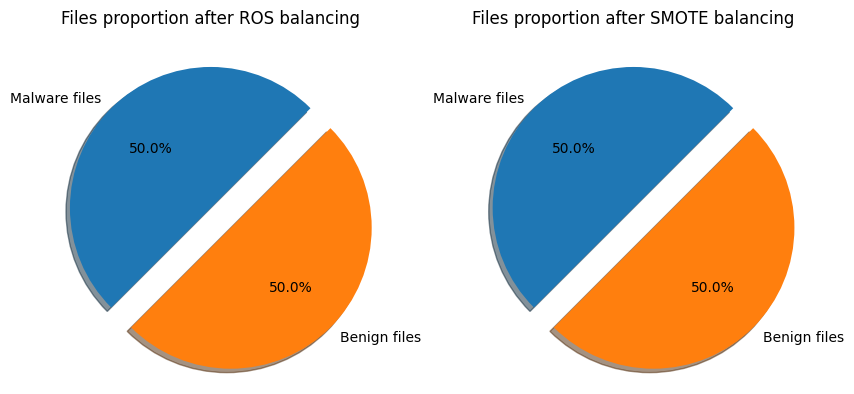

In [ ]:
y_ros_agg = np.array(y_ros_resampled.value_counts())
y_smote_agg = np.array(y_smote_resampled.value_counts())
y_labels = ['Malware files', 'Benign files']
myExplode = [0, 0.2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.pie(y_ros_agg, labels = y_labels, explode = myExplode, autopct='%1.1f%%', startangle = 45, shadow = True)
ax2.pie(y_smote_agg, labels = y_labels, explode = myExplode, autopct='%1.1f%%', startangle = 45, shadow = True)
ax1.set_title('Files proportion after ROS balancing')
ax2.set_title('Files proportion after SMOTE balancing')
print(y_smote_resampled.value_counts())
plt.show()

## **Top 5 Features**
### **Secondary Result - Question 3**





In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectPercentile

sel = GenericUnivariateSelect(chi2, mode='k_best', param = 5)
x_new = sel.fit(X_train, y_train)
print(x_new)
mask = x_new.get_support()
features = X_train.columns[mask]
print(features)

GenericUnivariateSelect(mode='k_best', param=5,
                        score_func=<function chi2 at 0x7f816b226170>)
Index(['compile_date', 'pointer_to_symbol_table', 'number_of_symbols',
       'CheckSum', 'image_base'],
      dtype='object')


In [ ]:
x_ = SelectPercentile(chi2, percentile=0.45).fit(X_train, y_train)
mask = x_.get_support()
features = X_train.columns[mask]
print(features)

Index(['compile_date', 'pointer_to_symbol_table', 'number_of_symbols',
       'CheckSum', 'image_base'],
      dtype='object')


## **Features**

###    > CheckSum
###    > number_of_symbols
###    > pointer_to_symbol_table
###    > filesize
###    > image_base

# **Decision tree model**

## Unbalanced

In [ ]:
# final tabulation array
prediction_array = []
#model
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred_Unbalanced_DT = model_DT.predict(X_test)
# adding result to array for tabulation
prediction_array.append(('y_pred_Unbalanced_DT', y_pred_Unbalanced_DT, 'NIL', model_DT.predict_proba(X_test)[:,1]))

## ROS Balanced

In [ ]:

model_ros_DT = DecisionTreeClassifier(criterion='entropy')
model_ros_DT.fit(X_ros_resampled, y_ros_resampled)
y_pred_ROS_DT = model_ros_DT.predict(X_test)
prediction_array.append(('y_pred_ROS_DT', y_pred_ROS_DT, 'NIL', model_ros_DT.predict_proba(X_test)[:, 1]))

## SMOTE Balanced

In [ ]:

model_smote_DT = DecisionTreeClassifier(criterion='entropy')
model_smote_DT.fit(X_smote_resampled, y_smote_resampled)
y_pred_SMOTE_DT = model_smote_DT.predict(X_test)
prediction_array.append(('y_pred_SMOTE_DT', y_pred_SMOTE_DT, 'NIL', model_smote_DT.predict_proba(X_test)[:, 1]))

## SMOTE DT plot

### **Secondary result - Question - 4**

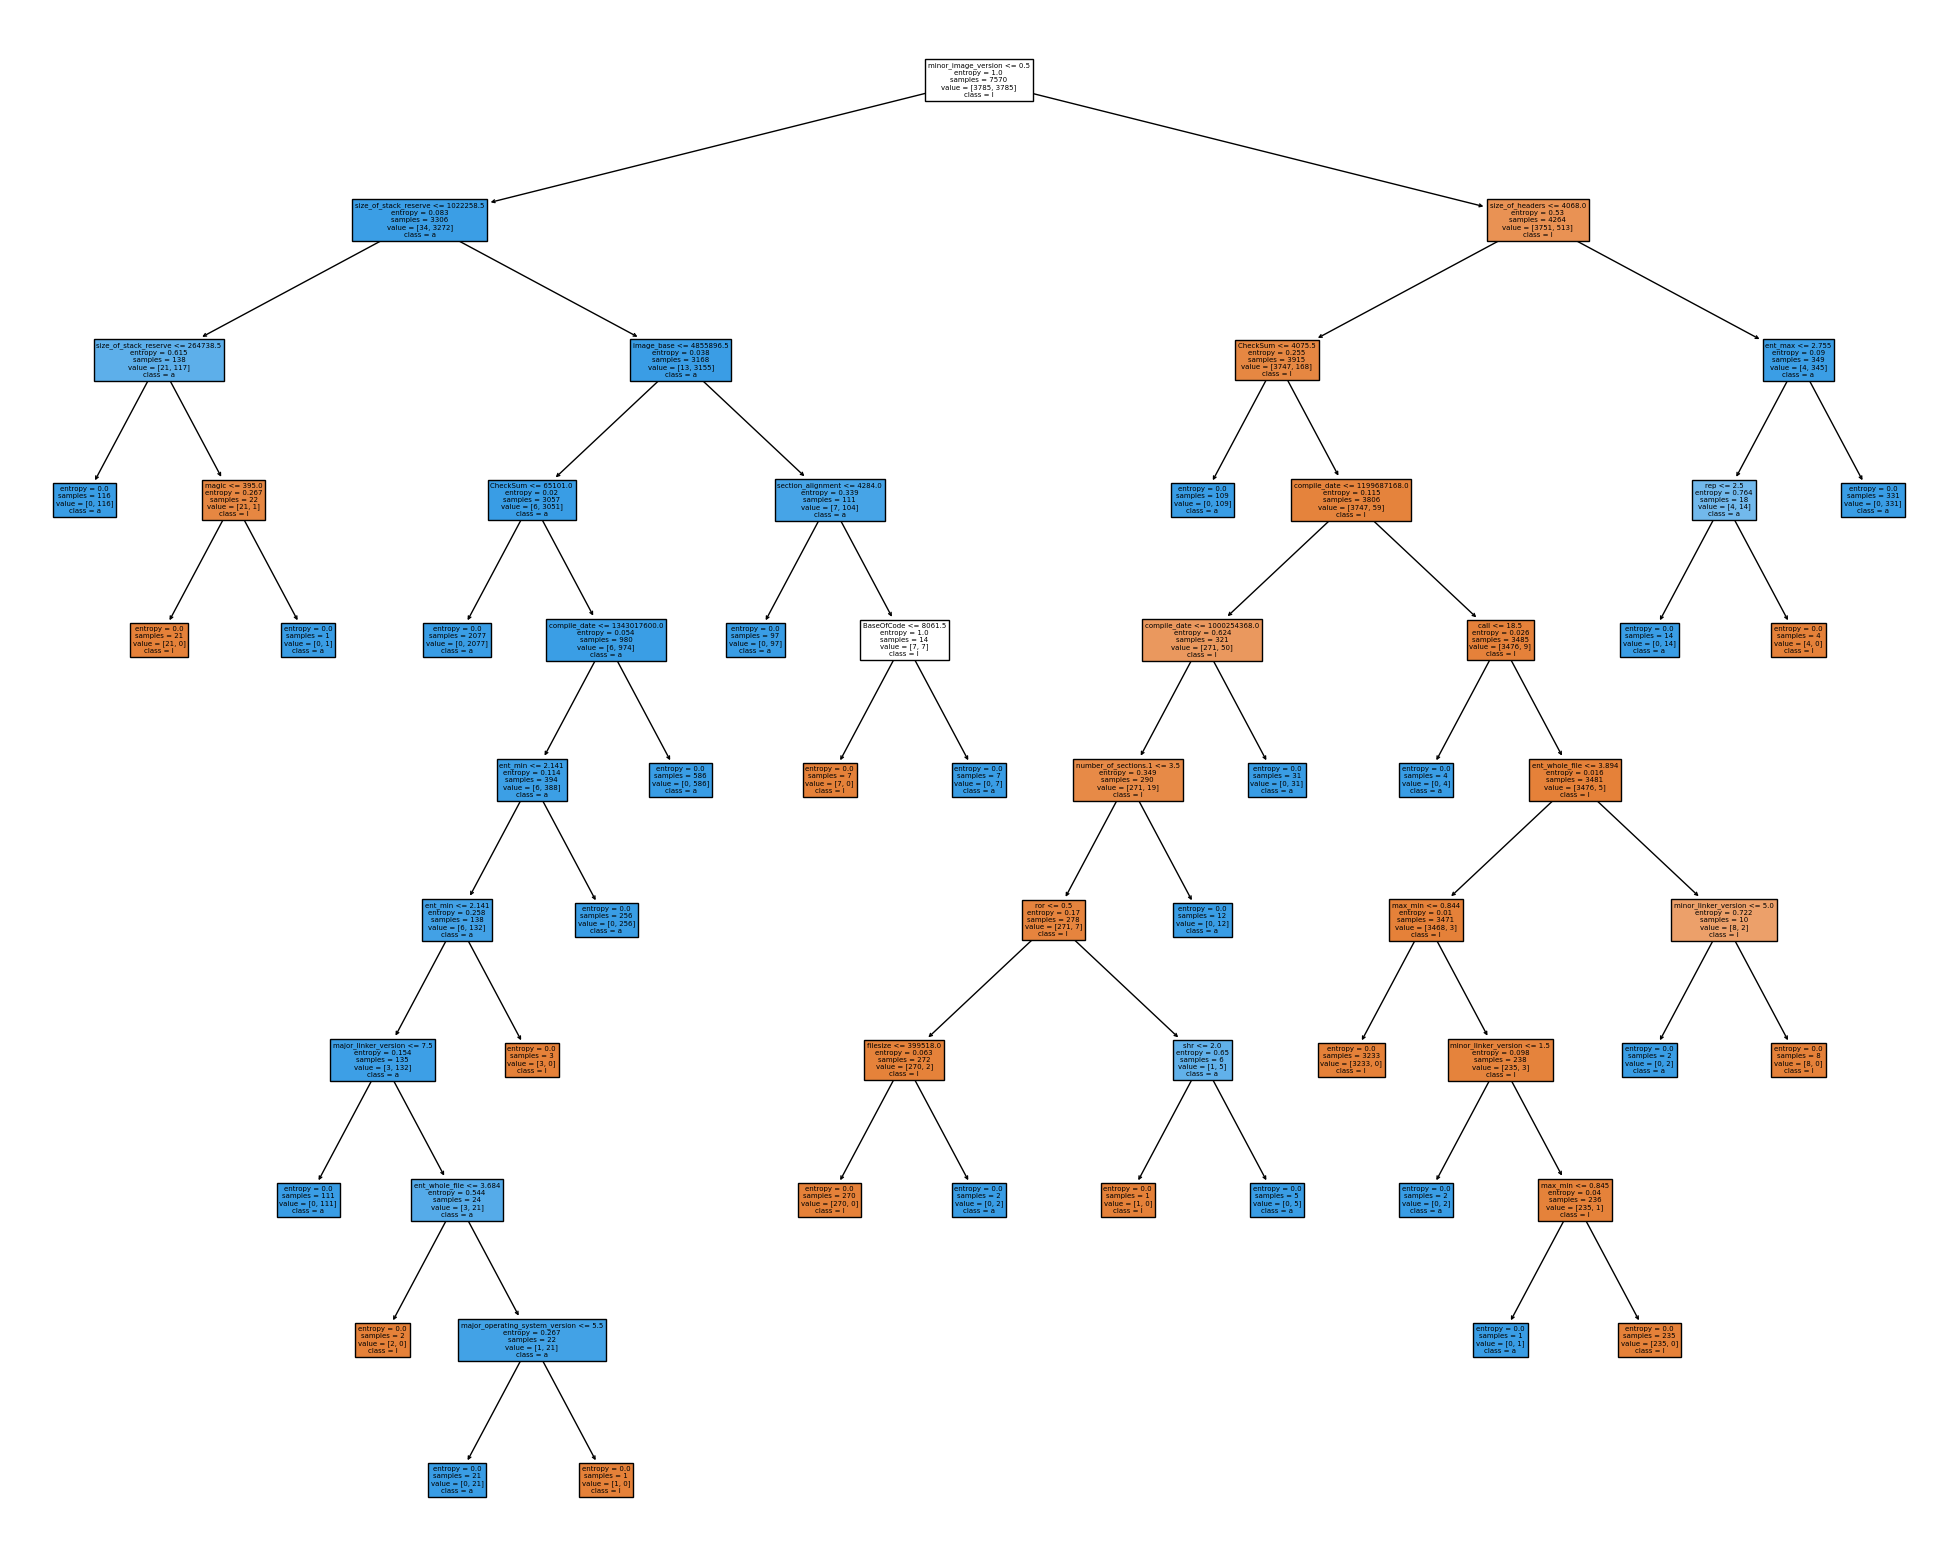

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_smote_DT,
                   feature_names=X_train.columns,
                   class_names=y_train.name,
                   filled=True)

## Random Forest Classifier (Unbalanced and SMOTE)

In [ ]:
model_Unbalanced_RF = RandomForestClassifier()
model_Unbalanced_RF.fit(X_train, y_train)
y_pred_Unbalanced_RF = model_Unbalanced_RF.predict(X_test)
prediction_array.append(('y_pred_Unbalanced_RF', y_pred_Unbalanced_RF, '10 trees', model_Unbalanced_RF.predict_proba(X_test)[:, 1]))

for i in [(5, -1), (10, -1), (20, -1), (10,5), (10,10), (10,20), (10,40), (10,100)]:
    if i[-1] == -1:
        parameter = str(i[0]) + ' trees'
        mf = 'sqrt'
    else:
        mf = i[-1]
        parameter = str(i[0]) + ' trees, ' + str(mf) + ' features'


    model_smote_RF = RandomForestClassifier(n_estimators = i[0], max_features = mf)
    model_smote_RF.fit(X_smote_resampled, y_smote_resampled)
    y_pred_SMOTE_RF = model_smote_RF.predict(X_test)
    prediction_array.append(('y_pred_SMOTE_RF', y_pred_SMOTE_RF, parameter, model_smote_RF.predict_proba(X_test)[:, 1]))

## K-Nearest Neighbors (Unbalanced and SMOTE)

In [ ]:

model_Unbalanced_KNN = KNeighborsClassifier(n_neighbors = 5)
model_Unbalanced_KNN.fit(X_train, y_train)
y_pred_Unbalanced_KNN = model_Unbalanced_KNN.predict(X_test)
prediction_array.append(('y_pred_Unbalanced_KNN', y_pred_Unbalanced_KNN, 'k=5', model_Unbalanced_KNN.predict_proba(X_test)[:, 1]))

for i in [1,3,5,10,20]:

    model_smote_KNN = KNeighborsClassifier(n_neighbors = i)
    model_smote_KNN.fit(X_smote_resampled, y_smote_resampled)
    y_pred_SMOTE_KNN = model_smote_KNN.predict(X_test)
    # adding result to array for tabulation
    prediction_array.append(('y_pred_SMOTE_KNN', y_pred_SMOTE_KNN, 'k='+str(i), model_smote_KNN.predict_proba(X_test)[:, 1]))

## Result Tabulation

# Primary Result


In [ ]:

metric_df = pd.DataFrame

metrics_dict = {'Algorithm': [],
                'Balance Strategy': [],
                'Parameter': [],
                'Accuracy': [],
                'AUC': [],
                'F1_Score': [],
                'Precision': [],
                'Recall': []
               }

for i in prediction_array:

    vals = i[0].split('_')
    Accuracy = accuracy_score(y_test, i[1])
    AUC = roc_auc_score(y_test, i[3])
    F1_Score = f1_score(y_test, i[1], pos_label = 0)
    Precision = precision_score(y_test, i[1], pos_label = 0)
    Recall = recall_score(y_test, i[1], pos_label = 0)
    metrics_dict['Algorithm'].append(vals[-1])
    metrics_dict['Balance Strategy'].append(vals[-2])
    metrics_dict['Parameter'].append(i[2])
    metrics_dict['Accuracy'].append(Accuracy)
    metrics_dict['AUC'].append(AUC)
    metrics_dict['F1_Score'].append(F1_Score)
    metrics_dict['Precision'].append(Precision)
    metrics_dict['Recall'].append(Recall)


df = pd.DataFrame(metrics_dict)
df.head(20)

,Algorithm,Balance Strategy,Parameter,Accuracy,AUC,F1_Score,Precision,Recall
0,DT,Unbalanced,NIL,0.989816,0.980521,0.947103,0.926108,0.969072
1,DT,ROS,NIL,0.991756,0.979282,0.956522,0.949239,0.963918
2,DT,SMOTE,NIL,0.993210,0.982395,0.964103,0.959184,0.969072
3,RF,Unbalanced,10 trees,0.994665,0.999530,0.971129,0.989305,0.953608
4,RF,SMOTE,5 trees,0.991756,0.999208,0.956743,0.944724,0.969072
5,RF,SMOTE,10 trees,0.993210,0.999517,0.964103,0.959184,0.969072
6,RF,SMOTE,20 trees,0.993210,0.999670,0.964286,0.954545,0.974227
7,RF,SMOTE,"10 trees, 5 features",0.985936,0.997966,0.928747,0.887324,0.974227
8,RF,SMOTE,"10 trees, 10 features",0.986906,0.992372,0.933002,0.899522,0.969072
9,RF,SMOTE,"10 trees, 20 features",0.990301,0.999156,0.949495,0.930693,0.969072
